# Reference

- https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb#scrollTo=cnqOZtUp1YR_

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import tensorflow as tf
mnist = tf.keras.datasets.mnist

In [26]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

d:\Arun 2022\Github\ML-DL-AI\myenv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8598 - loss: 0.4814
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9559 - loss: 0.1492
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9671 - loss: 0.1089
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9748 - loss: 0.0830
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9772 - loss: 0.0718
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9737 - loss: 0.0861


[0.07097470760345459, 0.978600025177002]

In [27]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - 1ms/step - accuracy: 0.9786 - loss: 0.0710


[0.07097470760345459, 0.978600025177002]

In [28]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [29]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[0.0853404 , 0.08534031, 0.08534466, 0.08535992, 0.0853403 ,
        0.08534031, 0.0853403 , 0.23191309, 0.08534031, 0.08534043],
       [0.08533696, 0.08533711, 0.23196593, 0.08533755, 0.08533696,
        0.08533767, 0.08533696, 0.08533696, 0.08533696, 0.08533696],
       [0.08535857, 0.23162404, 0.0853643 , 0.08536168, 0.08536094,
        0.0853594 , 0.08536647, 0.08542672, 0.0854192 , 0.08535872],
       [0.23194838, 0.08533807, 0.08534625, 0.08533807, 0.08533807,
        0.08533823, 0.08533856, 0.08533821, 0.08533807, 0.08533809],
       [0.0854203 , 0.08541244, 0.08541705, 0.08541248, 0.23076732,
        0.08541293, 0.0854138 , 0.08542735, 0.08541272, 0.08590374]],
      dtype=float32)>

In [30]:
# Train the model
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1, verbose=2)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

Epoch 1/5
1688/1688 - 3s - 2ms/step - accuracy: 0.9801 - loss: 0.0632 - val_accuracy: 0.9883 - val_loss: 0.0394
Epoch 2/5
1688/1688 - 3s - 2ms/step - accuracy: 0.9820 - loss: 0.0567 - val_accuracy: 0.9882 - val_loss: 0.0406
Epoch 3/5
1688/1688 - 3s - 2ms/step - accuracy: 0.9831 - loss: 0.0502 - val_accuracy: 0.9863 - val_loss: 0.0457
Epoch 4/5
1688/1688 - 3s - 2ms/step - accuracy: 0.9853 - loss: 0.0459 - val_accuracy: 0.9873 - val_loss: 0.0421
Epoch 5/5
1688/1688 - 3s - 2ms/step - accuracy: 0.9851 - loss: 0.0436 - val_accuracy: 0.9857 - val_loss: 0.0507
313/313 - 0s - 1ms/step - accuracy: 0.9799 - loss: 0.0745


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


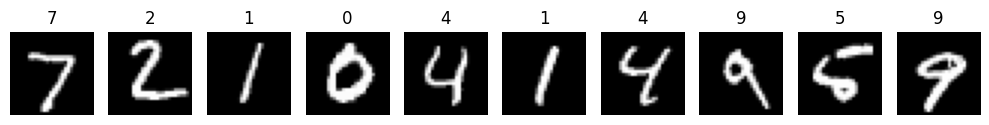

In [31]:
# Plot sample images from the dataset
def plot_images(images, labels, predictions=None):
    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 10, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.axis('off')
        if predictions is not None:
            plt.title(f"{np.argmax(predictions[i])}")
        else:
            plt.title(f"{labels[i]}")
    plt.tight_layout()
    plt.show()
    
# Make predictions
predictions = model.predict(x_test)

# Plot sample images and their predictions
plot_images(x_test[:10], y_test[:10], predictions[:10])

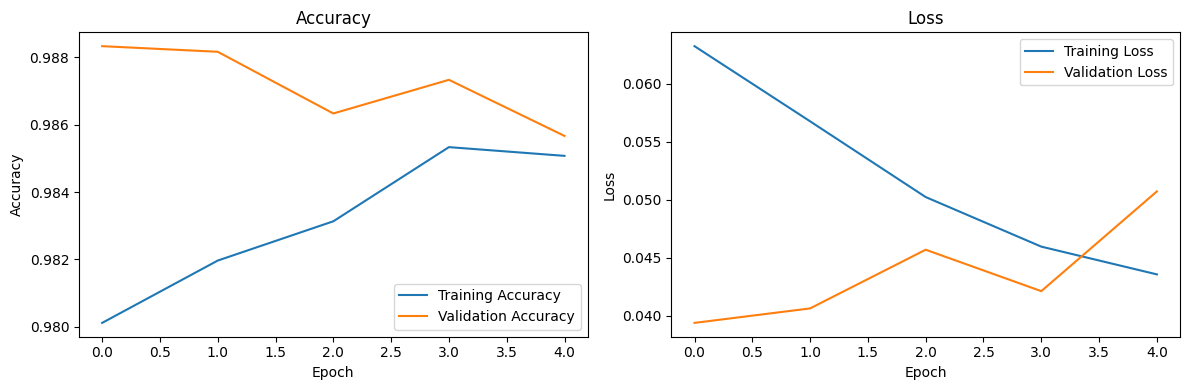

In [32]:
# Plot accuracy and loss curves
def plot_training_curves(history):
    plt.figure(figsize=(12, 4))
    
    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy')
    
    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss')
    
    plt.tight_layout()
    plt.show()

# Plot training curves
plot_training_curves(history)

## Confusion matrix

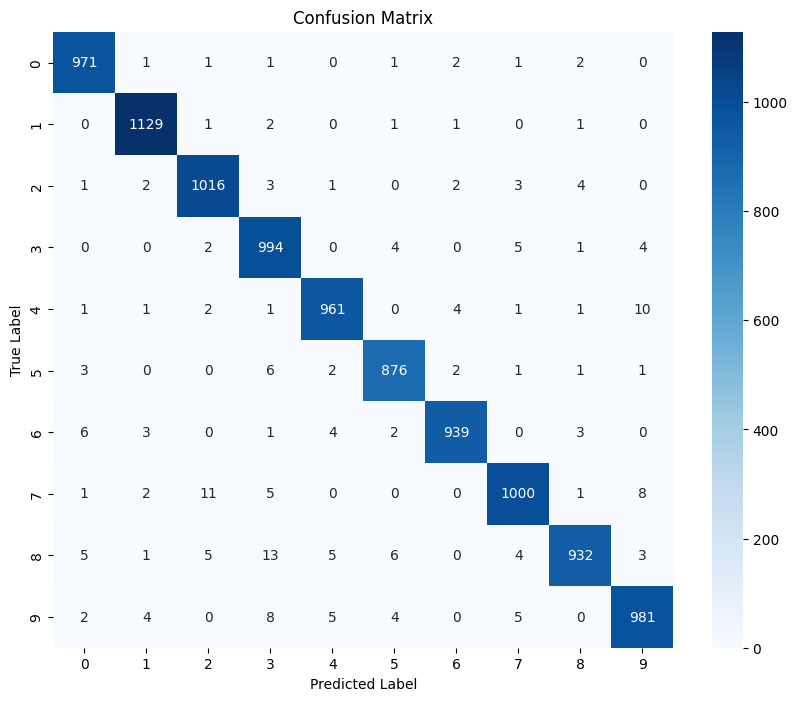

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute the confusion matrix
y_pred = np.argmax(predictions, axis=1)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## ROC Curve

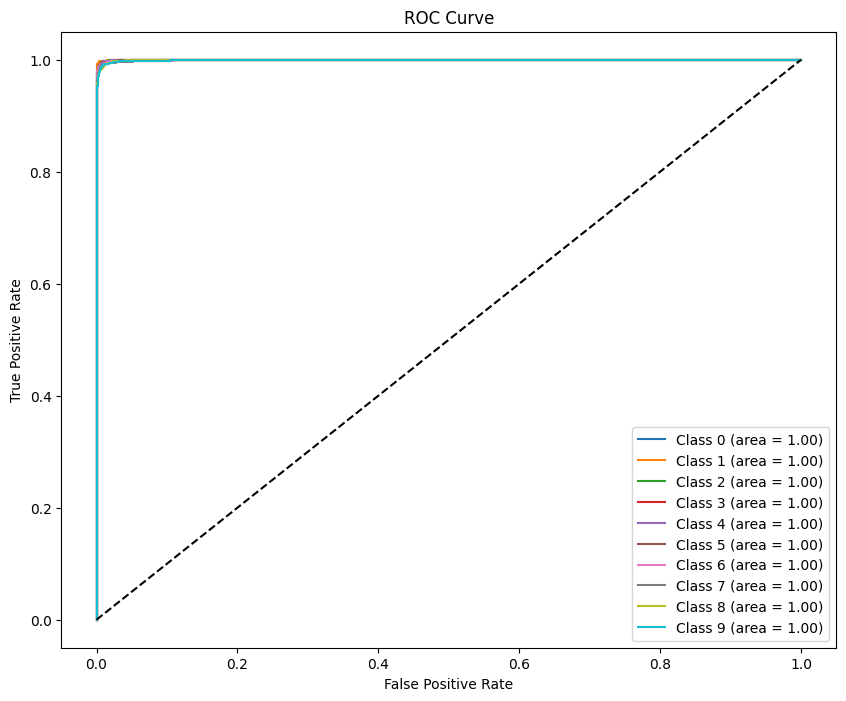

In [34]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the labels for ROC curve
y_test_bin = label_binarize(y_test, classes=range(10))
y_pred_bin = predictions

# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(10, 8))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## Model Summary

In [35]:
# Print the model summary
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)

## Learning Rate Scheduler

In [39]:
import matplotlib.pyplot as plt

def plot_lr_scheduler(history):
    # If using a learning rate scheduler, plot its values
    if 'lr_scheduler' in history.history:
        plt.figure(figsize=(10, 6))
        plt.plot(history.history['lr_scheduler'])
        plt.xlabel('Epoch')
        plt.ylabel('Learning Rate')
        plt.title('Learning Rate Scheduler')
        plt.show()

# Example: Plot learning rate scheduler
plot_lr_scheduler(history)